# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# Part 1.a: Lists the student names and IDs at the top of the notebook to identify the project team.
#
#                            ===========  STUDENT DETAILS  ===========
#                                student details 1: Sivan A 7198
#                                student details 2: Ariel B 8774
#                                student details 3: Guy C 3277
#                                student details 4: Michael C 3689
#                                student details 5: Baruch I 9903

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
# Part 1.b: Lists the AI assistance prompts used during the project, documenting how ChatGPT was consulted for debugging, plotting, and feature-engineering questions.
#
AI agent name: ChatGPT
Goal: Help debugging syntax and other code errors, help rephrase complex English sentences.
Propmpt1: I'm getting a KeyError when trying to access a column in my pandas DataFrame. How can I solve this error?
    
Propmpt2: Can you show me an example of how to plot a confusion matrix in Python using seaborn?
    
Prompt3: In my Jupyter notebook, one of the plots shows up empty even after running the cell. What could be the reason and how can I fix it?

Prompt4: I get the error: ValueError: Found input variables with inconsistent numbers of samples. How can I fix this?

Prompt5: When I use GridSearchCV, it takes forever to run. How can I reduce the runtime while still getting valid results?

Prompt6: Why is my seaborn heatmap not showing up in Jupyter? Do I need to call plt.show() or something else?

Prompt7: I'm getting a KeyError: 'target' when running my code. Can you show me how to check if the column exists in the DataFrame?

Prompt8: Do you think we have enough coverage for Feature Engineering in the notebook so far?

Prompt9: Can you help me create short captions/descriptions for each cell in this Jupyter notebook?

AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    No other AI agents or external links were used.
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
# Part 1.c: Provides a short description of the project goal and dataset: predicting malignant vs. benign tumors using 30 numerical features from the Breast Cancer Wisconsin dataset.
#
This project addresses a supervised binary classification task using the
Breast Cancer Wisconsin (Diagnostic) dataset.
The goal is to predict whether a tumor is malignant or benign based on
30 numerical features extracted from cell nuclei images,
such as radius, texture, area, smoothness, and symmetry.
The dataset contains 569 samples in total, with 212 malignant
and 357 benign cases.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
# Part 2.a: Imports libraries, loads the train and test CSV files into DataFrames, and displays their shapes and first rows for a quick preview.
#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set_theme(context="notebook", style="whitegrid")

TRAIN_PATH = "cancer_train.csv"
TEST_PATH  = "cancer_test.csv"

df_train = pd.read_csv(TRAIN_PATH)
df_test  = pd.read_csv(TEST_PATH)

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

print("\n=== Train: head(5) ===")
display(df_train.head(5))

print("\n=== Test: head(5) ===")
display(df_test.head(5))

Train shape: (455, 31)
Test shape: (114, 31)

=== Train: head(5) ===


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643,15.670,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,0.3776,1.3500,2.569,22.73,0.007501,0.01989,0.02714,0.009883,0.01960,0.003913,11.140,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,7.804,130.80,0.007964,0.04732,0.07649,0.019360,0.02736,0.005928,23.680,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.018350,0.06760,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.01560,0.02975,0.009753,0.01295,0.002436,20.380,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0



=== Test: head(5) ===


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,0.1745,0.4890,1.3490,14.910,0.004510,0.01812,0.01951,0.011960,0.01934,0.003696,16.970,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,0.4165,0.6237,2.5610,37.110,0.004953,0.01812,0.03035,0.008648,0.01539,0.002281,16.760,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,0.8191,1.9310,4.4930,103.900,0.008074,0.04088,0.05321,0.018340,0.02383,0.004515,22.660,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.0940,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,0.1458,0.9050,0.9975,11.360,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972,13.860,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [3]:
# Part 2.b: Normalizes the target column by mapping malignant/benign labels to 1/0, confirms the chosen column, shows class distribution, and prints feature data types.
#
possible_targets = ["diagnosis", "target", "label", "Class", "class", "y"]
def normalize_target(df):
    tgt = None
    for c in possible_targets:
        if c in df.columns:
            tgt = c
            break
    if tgt is None:
        raise ValueError("Could not find target column. Please rename your label column to one of: " + ", ".join(possible_targets))
    s = df[tgt]
    if s.dtype == "O":
        df["target"] = s.map({"M": 1, "B": 0}).astype(int)
    else:
        df["target"] = s.astype(int)
    return df, tgt

df_train, original_target_col_train = normalize_target(df_train)
df_test,  original_target_col_test  = normalize_target(df_test)

print("Original target col (train):", original_target_col_train)
print("Original target col (test): ", original_target_col_test)

print("\nClass distribution (train):")
display(df_train["target"].value_counts().rename({1:"Malignant (1)", 0:"Benign (0)"}))

print("\nDtypes (train):")
display(df_train.dtypes)

Original target col (train): target
Original target col (test):  target

Class distribution (train):


target
Malignant (1)    277
Benign (0)       178
Name: count, dtype: int64


Dtypes (train):


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [4]:
# Part 2.c: Checks for missing values and duplicates in train/test, reports results, and identifies how many numeric feature columns are available for modeling.
#
def missing_table(df, name):
    miss = df.isna().sum().to_frame(name="missing_count")
    miss["missing_%"] = (100 * miss["missing_count"] / len(df)).round(2)
    print(f"=== Missing values: {name} ===")
    return miss[miss["missing_count"] > 0].sort_values("missing_%", ascending=False)

miss_train = missing_table(df_train, "train")
miss_test  = missing_table(df_test,  "test")

display(miss_train if len(miss_train) else pd.DataFrame({"info":["No missing values in train"]}))
display(miss_test  if len(miss_test)  else pd.DataFrame({"info":["No missing values in test"]}))

dup_train = df_train.duplicated().sum()
print(f"\nDuplicate rows in train: {dup_train}")

num_cols = [c for c in df_train.columns if pd.api.types.is_numeric_dtype(df_train[c]) and c != "target"]
print(f"\nNumeric feature count: {len(num_cols)}")

=== Missing values: train ===
=== Missing values: test ===


,info
0,No missing values in train


,info
0,No missing values in test



Duplicate rows in train: 0

Numeric feature count: 30


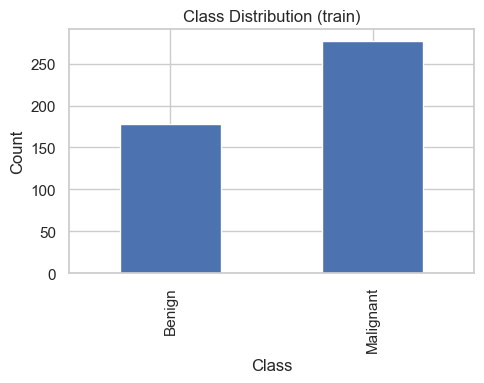

In [5]:
# Part 2.d: Plots a bar chart of the training set’s class distribution, showing counts of benign vs. malignant cases.
#
fig, ax = plt.subplots(figsize=(5, 4))
(df_train["target"]
 .map({1:"Malignant", 0:"Benign"})
 .value_counts()
 .reindex(["Benign", "Malignant"])
 .plot(kind="bar", ax=ax))
ax.set_title("Class Distribution (train)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

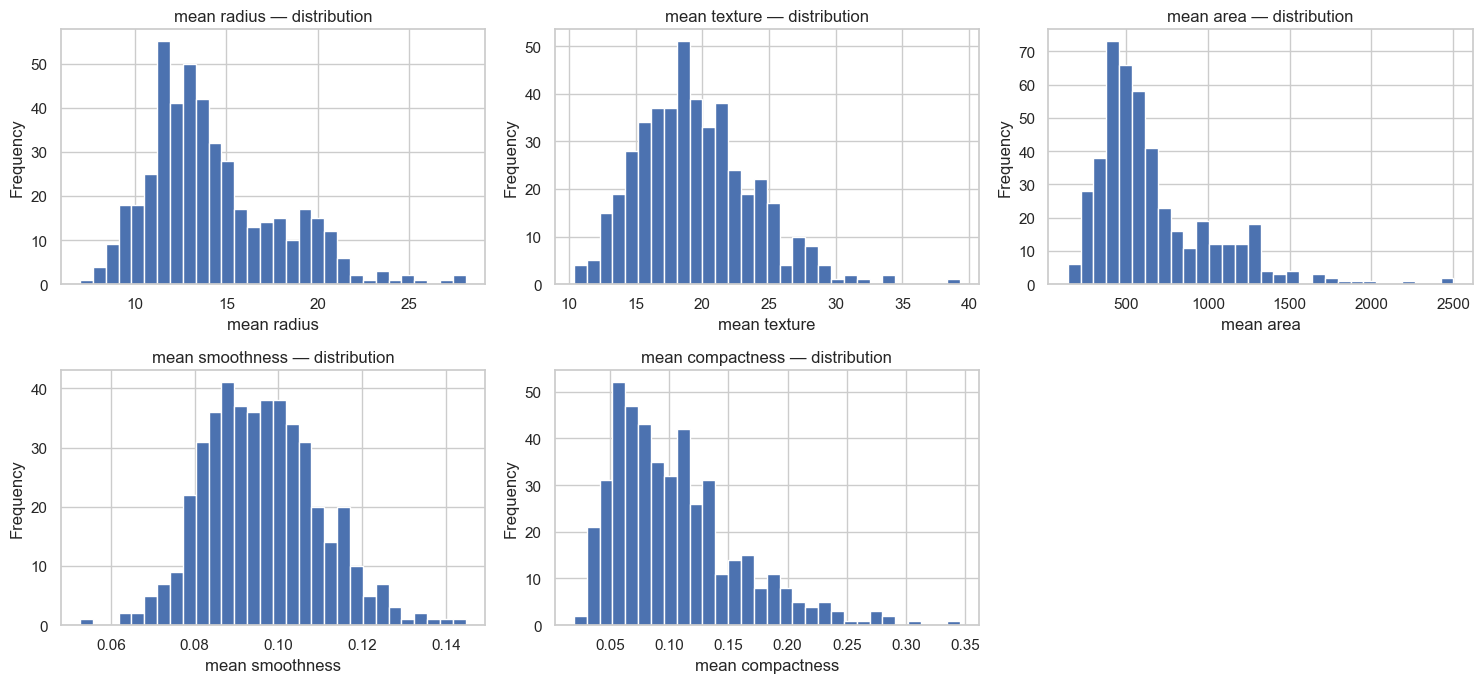

In [6]:
# Part 2.e: Plots histograms of selected key features in the training set to visualize their distributions and spot differences in scale or shape.
#
key_feats = [
    "mean radius", "mean texture", "mean area", "mean smoothness", "mean compactness"
]
key_feats = [c for c in key_feats if c in df_train.columns]

n = len(key_feats)
cols = 3
rows = int(np.ceil(n / cols)) if n else 1

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.5*rows))
axes = np.array(axes).reshape(rows, cols)

for ax, col in zip(axes.ravel(), key_feats):
    df_train[col].hist(bins=30, ax=ax)
    ax.set_title(f"{col} — distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

for ax in axes.ravel()[len(key_feats):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

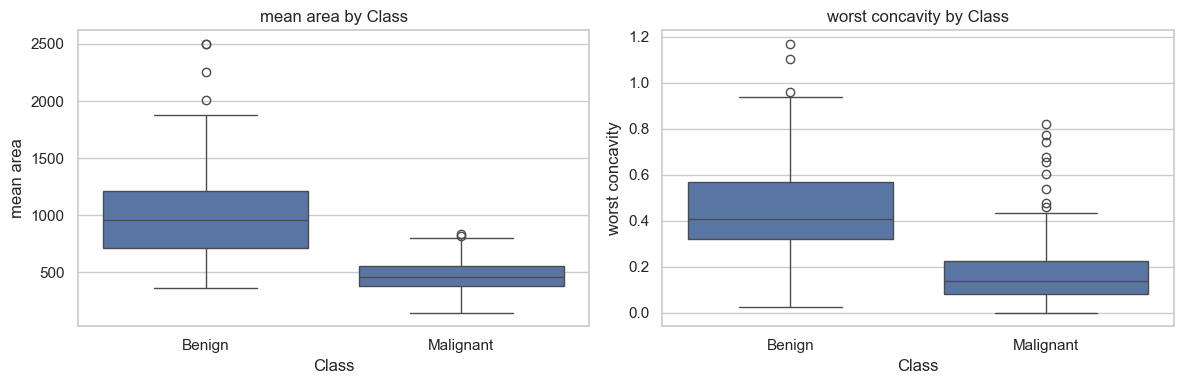

In [7]:
# Part 2.f: Draws boxplots of selected features split by class, showing how benign and malignant cases differ in their values.
#
cand_box = ["mean area", "worst concavity"]
cand_box = [c for c in cand_box if c in df_train.columns]

fig, axes = plt.subplots(1, len(cand_box), figsize=(6*len(cand_box), 4))
if len(cand_box) == 1:
    axes = [axes]

for ax, col in zip(axes, cand_box):
    sns.boxplot(
        data=df_train,
        x=df_train["target"].map({0:"Benign", 1:"Malignant"}),
        y=col,
        ax=ax
    )
    ax.set_xlabel("Class")
    ax.set_ylabel(col)
    ax.set_title(f"{col} by Class")

plt.tight_layout()
plt.show()


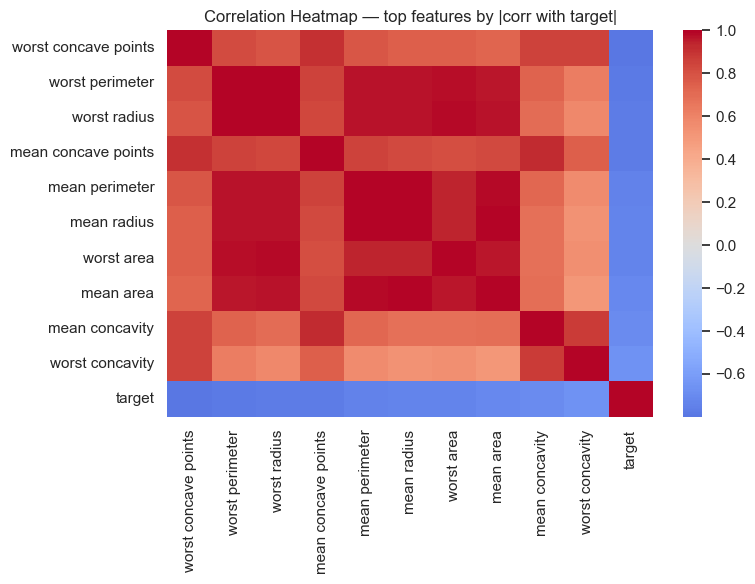

In [8]:
# Part 2.g: Computes correlations with the target, selects the top features, and visualizes their relationships in a heatmap.
#
corr = df_train[num_cols + ["target"]].corr(numeric_only=True)
target_corr = corr["target"].drop("target").sort_values(key=np.abs, ascending=False)

topk = 10
top_feats = list(target_corr.head(topk).index)

corr_top = df_train[top_feats + ["target"]].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_top, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — top features by |corr with target|")
plt.tight_layout()
plt.show()

Features chosen for drift check: ['mean radius', 'mean texture']


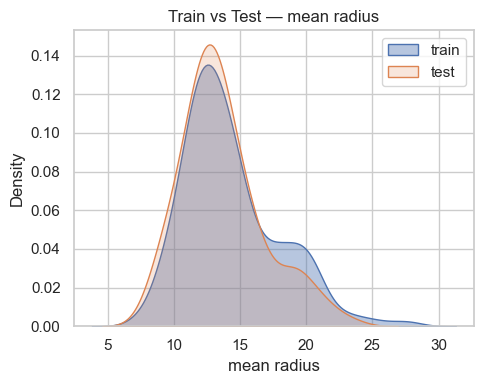

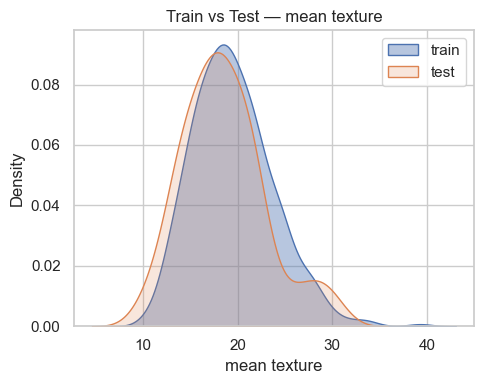

In [9]:
# Part 2.h: Checks for data drift by comparing train vs. test distributions of two numeric features using density plots.
#
num_cols = [c for c in df_train.columns 
            if pd.api.types.is_numeric_dtype(df_train[c]) and c != "target"]

check_feats = num_cols[:2]
print("Features chosen for drift check:", check_feats)

for col in check_feats:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(df_train[col], label="train", fill=True, alpha=0.4)
    sns.kdeplot(df_test[col],  label="test",  fill=True, alpha=0.2)
    plt.title(f"Train vs Test — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

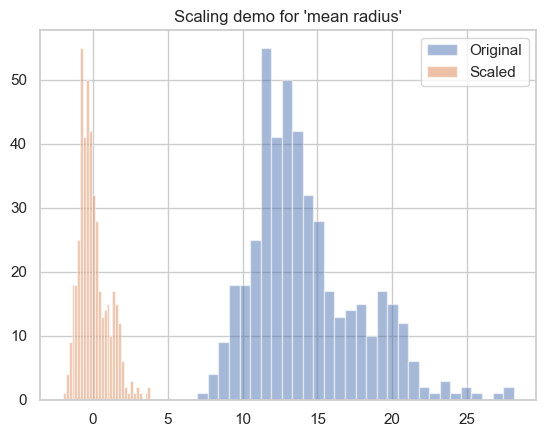

In [10]:
# Part 2.i: Demonstrates feature engineering by showing how scaling transforms the distribution of a numeric feature (mean radius).
#
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

feat = "mean radius"
x_raw = df_train[feat].values.reshape(-1, 1)
x_scaled = StandardScaler().fit_transform(x_raw).ravel()

plt.hist(x_raw.ravel(), bins=30, alpha=0.5, label="Original")
plt.hist(x_scaled, bins=30, alpha=0.5, label="Scaled")
plt.title(f"Scaling demo for '{feat}'")
plt.legend()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [11]:
# Part 3.a: Starts the modeling pipeline setup: imports ML tools, defines X/y from the train set (numeric features only), and prepares data for cross-validation and hyperparameter tuning.
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import make_scorer, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

assert "target" in df_train.columns, "Missing 'target' column; make sure Part 2 created it."

y = df_train["target"].astype(int)
X = df_train.drop(columns=["target"])
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
X = X[num_cols].copy()

print("Train shape:", X.shape)
print("Numeric features:", len(num_cols))

Train shape: (455, 30)
Numeric features: 30


In [12]:
# Part 3.b: Defines F1 as the scoring metric, sets 5-fold stratified cross-validation for fair evaluation, and picks candidate k values for feature selection.
#
scorer = make_scorer(f1_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_k = min(20, X.shape[1])
k_list = sorted(set([max(5, max_k//2), max_k]))
print("SelectKBest k candidates:", k_list)


SelectKBest k candidates: [10, 20]


In [13]:
# Part 3.c: Builds three ML pipelines (KNN, Decision Tree, Naïve Bayes), each combining scaling, feature selection, and classifier, with grids of hyperparameters for tuning.
#
pipe_knn = Pipeline([
    ("scale", StandardScaler()),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_list[0])),
    ("clf", KNeighborsClassifier())
])
grid_knn = {
    "select__k": k_list,
    "clf__n_neighbors": [3, 5, 7, 9],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2],
}

pipe_dt = Pipeline([
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_list[0])),
    ("clf", DecisionTreeClassifier(random_state=42))
])
grid_dt = {
    "select__k": k_list,
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [None, 3, 5, 7, 10],
    "clf__min_samples_split": [2, 5, 10],
}

pipe_nb = Pipeline([
    ("scale", StandardScaler()),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k_list[0])),
    ("clf", GaussianNB())
])
grid_nb = {
    "select__k": k_list,
    "clf__var_smoothing": [1e-9, 1e-8],
}

print("✅ Pipelines ready: KNN + Decision Tree + Naïve Bayes")

✅ Pipelines ready: KNN + Decision Tree + Naïve Bayes


In [14]:
# Part 3.d: Runs 5-fold GridSearchCV for KNN, Decision Tree, and Naïve Bayes, prints per-fold F1 scores, summarizes the best configs, and selects the top-performing model as the final candidate.
#
def run_gs(name, pipe, grid):
    gs = GridSearchCV(
        estimator=pipe, param_grid=grid,
        scoring=scorer, cv=cv, n_jobs=-1, verbose=0, return_train_score=False
    )
    gs.fit(X, y)
    fold_cols = [c for c in gs.cv_results_.keys() if c.startswith("split") and c.endswith("_test_score")]
    print("Per-fold F1 scores for the best params:")
    print([gs.cv_results_[col][gs.best_index_] for col in fold_cols])
    print("Mean F1 (5-fold):", gs.best_score_)
    best = gs.best_estimator_
    best_row = {
        "model": name,
        "F1_mean_CV": gs.best_score_,
        "best_params": best.get_params()
    }
    return best, best_row, pd.DataFrame(gs.cv_results_)

best_models = {}
summary_rows = []
raw_results = {}

for name, pipe, grid in [
    ("KNN", pipe_knn, grid_knn),
    ("DecisionTree", pipe_dt, grid_dt),
    ("NaiveBayes", pipe_nb, grid_nb)
]:
    print(f"\n=== GridSearchCV: {name} ===")
    best, row, res = run_gs(name, pipe, grid)
    best_models[name] = best
    summary_rows.append(row)
    raw_results[name] = res

df_summary = pd.DataFrame(summary_rows).sort_values("F1_mean_CV", ascending=False)
display(df_summary)

best_name = df_summary.iloc[0]["model"]
final_candidate = best_models[best_name]
print(f"\nWinner: {best_name}  |  F1_mean_CV = {df_summary.iloc[0]['F1_mean_CV']:.4f}")


=== GridSearchCV: KNN ===
Per-fold F1 scores for the best params:
[np.float64(0.9821428571428571), np.float64(0.9908256880733946), np.float64(0.9454545454545454), np.float64(0.9655172413793104), np.float64(0.9911504424778761)]
Mean F1 (5-fold): 0.9750181549055966

=== GridSearchCV: DecisionTree ===
Per-fold F1 scores for the best params:
[np.float64(0.954954954954955), np.float64(0.9557522123893806), np.float64(0.990990990990991), np.float64(0.9482758620689655), np.float64(0.9357798165137615)]
Mean F1 (5-fold): 0.9571507673836107

=== GridSearchCV: NaiveBayes ===
Per-fold F1 scores for the best params:
[np.float64(0.9636363636363636), np.float64(0.9557522123893806), np.float64(0.9369369369369369), np.float64(0.9482758620689655), np.float64(0.954954954954955)]
Mean F1 (5-fold): 0.9519112659973203


,model,F1_mean_CV,best_params
0,KNN,0.975018,"{'memory': None, 'steps': [('scale', StandardS..."
1,DecisionTree,0.957151,"{'memory': None, 'steps': [('select', SelectKB..."
2,NaiveBayes,0.951911,"{'memory': None, 'steps': [('scale', StandardS..."



Winner: KNN  |  F1_mean_CV = 0.9750


In [15]:
# Part 3.e: Evaluates each best model again with 5-fold CV using accuracy as the metric, and builds a table comparing mean accuracy scores.
#
from sklearn.model_selection import cross_val_score
acc_scores = []
for name, model in best_models.items():
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    acc_scores.append({"model": name, "Accuracy_mean_CV": scores.mean()})
df_acc = pd.DataFrame(acc_scores).sort_values("Accuracy_mean_CV", ascending=False)
display(df_acc)

,model,Accuracy_mean_CV
0,KNN,0.953846
1,DecisionTree,0.947253
2,NaiveBayes,0.938462


=== Summary to plot ===


,model,F1_mean_CV,Accuracy_mean_CV
0,KNN,0.975018,0.953846
1,DecisionTree,0.957151,0.947253
2,NaiveBayes,0.951911,0.938462


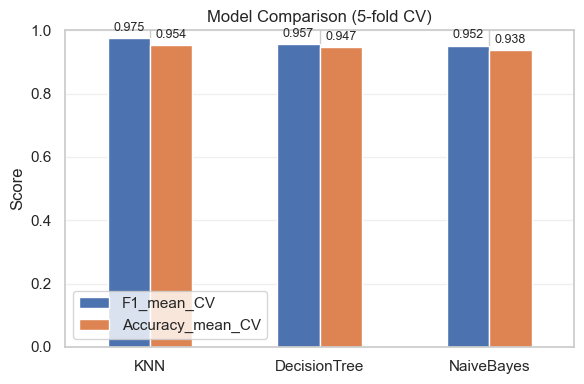

Best model saved as `final_candidate` for Part 4 (retrain on full train, then test).


In [16]:
# Part 3.f: Combines F1 and accuracy results into a summary, plots a bar chart comparing models, and confirms the best model as final_candidate for the next stage.
#
df_plot = (
    df_summary[["model", "F1_mean_CV"]]
    .merge(df_acc, on="model", how="left")
    .sort_values("F1_mean_CV", ascending=False)
    .reset_index(drop=True)
)

print("=== Summary to plot ===")
display(df_plot)

ax = df_plot.set_index("model")[["F1_mean_CV", "Accuracy_mean_CV"]].plot(
    kind="bar", figsize=(6,4), rot=0
)
ax.set_title("Model Comparison (5-fold CV)")
ax.set_ylabel("Score")
ax.set_xlabel("")
ax.set_ylim(0, 1)
ax.grid(axis="y", alpha=0.3)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9,
                xytext=(0, 3), textcoords="offset points")

plt.tight_layout()
plt.show()

print("Best model saved as `final_candidate` for Part 4 (retrain on full train, then test).")

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [17]:
# Part 4.a: Clones the winning pipeline, retrains it on the entire training set with selected hyperparameters, and prints its structure.
#
from sklearn.base import clone

assert "final_candidate" in globals(), "Missing final_candidate (run Part 3 first)"
assert X.shape[0] == df_train.shape[0], "X must be the full training features from Part 3"
assert y.shape[0] == df_train.shape[0], "y must be the full training labels from Part 3"

final_model = clone(final_candidate)
final_model.fit(X, y)

print("✅ Re-trained best pipeline on FULL train.")
print("Pipeline steps:", [name for name, _ in final_model.steps])
print("Best hyper-parameters (pipeline-level):")
for k, v in final_model.get_params().items():
    if k.startswith("clf__") or k.startswith("select__") or k in ["scale", "scaler"]:
        pass

✅ Re-trained best pipeline on FULL train.
Pipeline steps: ['scale', 'select', 'clf']
Best hyper-parameters (pipeline-level):


In [18]:
# Part 4.b: Performs a sanity check by re-evaluating the final model with 5-fold cross-validation on the training set, reporting mean and std of F1 scores.
#
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

cv_f1 = cross_val_score(final_model, X, y, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
print(f"Sanity F1 (5-fold on train): mean={cv_f1.mean():.4f}  std={cv_f1.std():.4f}")

Sanity F1 (5-fold on train): mean=0.9682  std=0.0142


In [19]:
# Part 4.c: Verifies that the final trained pipeline exists in memory and prints its full structure.
#
try:
    final_model
except NameError:
    raise RuntimeError("Best pipeline is not in memory. Please run Part 4.a (retrain) first.")

print(final_model)

Pipeline(steps=[('scale', StandardScaler()),
                ('select',
                 SelectKBest(k=20,
                             score_func=<function mutual_info_classif at 0x000001D8AC800360>)),
                ('clf',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])


## Part 5 - Apply on test and show model performance estimation

In [20]:
# Part 5.a: Loads the test set, identifies the target column, converts it to numeric if needed, and prepares the numeric features for evaluation.
#
import numpy as np
import pandas as pd

try:
    final_model
except NameError:
    raise RuntimeError("Best pipeline is not in memory. Run Part 4 (retrain) before Part 5.")

try:
    df_test
except NameError:
    df_test = pd.read_csv("cancer_test.csv")

possible_targets = ["diagnosis", "target", "label", "Class", "class", "y"]
tgt = next((c for c in possible_targets if c in df_test.columns), None)
if tgt is None:
    raise ValueError("Could not find target column in test set. Checked: " + ", ".join(possible_targets))

if df_test[tgt].dtype == "O":
    y_test = df_test[tgt].map({"M": 1, "B": 0}).astype(int)
else:
    y_test = df_test[tgt].astype(int)

try:
    num_cols
except NameError:
    num_cols = [c for c in df_test.columns if pd.api.types.is_numeric_dtype(df_test[c]) and c != tgt]

X_test = df_test[num_cols].copy()

print("Test shape:", X_test.shape)
print("Using", len(num_cols), "numeric features")

Test shape: (114, 30)
Using 30 numeric features


In [21]:
# Part 5.b: Evaluates the model on the test set, printing accuracy, precision, recall, F1, a classification report, and previewing the first predictions.
#
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = final_model.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec  = recall_score(y_test, y_pred, pos_label=1)
f1   = f1_score(y_test, y_pred, pos_label=1)

print("=== Test Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Benign (0)", "Malignant (1)"]))

out = pd.DataFrame({"y_true": y_test.values, "y_pred": y_pred})

if hasattr(final_model, "predict_proba"):
    try:
        out["p(Malignant)"] = final_model.predict_proba(X_test)[:, 1]
    except Exception:
        pass

cols = ["row_id", "y_true", "y_pred"]
if "p(Malignant)" in out.columns:
    cols.append("p(Malignant)")

first5 = out.reset_index(names="row_id").loc[:4, cols]
print("\n=== First 5 Predictions on Test ===")
display(first5)

=== Test Metrics ===
Accuracy : 0.9649
Precision: 0.9872
Recall   : 0.9625
F1-score : 0.9747

=== Classification Report ===
               precision    recall  f1-score   support

   Benign (0)       0.92      0.97      0.94        34
Malignant (1)       0.99      0.96      0.97        80

     accuracy                           0.96       114
    macro avg       0.95      0.97      0.96       114
 weighted avg       0.97      0.96      0.97       114


=== First 5 Predictions on Test ===


,row_id,y_true,y_pred,p(Malignant)
0,0,1,1,1.0
1,1,1,1,1.0
2,2,0,0,0.0
3,3,1,1,1.0
4,4,1,1,1.0


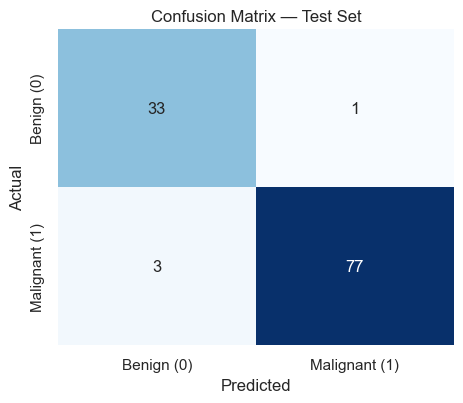

In [22]:
# Part 5.c: Plots a confusion matrix heatmap of the test set to visualize prediction performance across benign and malignant classes.
#
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

plt.figure(figsize=(4.8, 4.2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Test Set")
plt.tight_layout()
plt.show()

In [23]:
# Part 5.d: Displays a clean preview of the first five test predictions directly in the notebook.
#
print("\n=== First 5 Predictions on Test (clean preview) ===")
preview_cols = ['row_id', 'y_true', 'y_pred']
if "p(Malignant)" in out.columns:
    preview_cols.append("p(Malignant)")

display(out.reset_index(names="row_id").loc[:4, preview_cols])


=== First 5 Predictions on Test (clean preview) ===


,row_id,y_true,y_pred,p(Malignant)
0,0,1,1,1.0
1,1,1,1,1.0
2,2,0,0,0.0
3,3,1,1,1.0
4,4,1,1,1.0
